In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import gzip
import random


In [16]:
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))
#parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
with gzip.open('C:/Users/Akschaya balaji/Downloads/train.gz') as f:
    train = pd.read_csv(f,skiprows = skip_values)


In [17]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10012222478217629851,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,100084,79
1,10022511657747302161,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
2,10029327953743827349,0,14102100,1005,1,72a56356,45368af7,3e814130,ecad2386,7801e8d9,...,1,2,20596,320,50,2161,0,35,-1,157
3,10031235229753459941,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79
4,10032841083776201932,0,14102100,1005,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,100188,157


In [18]:
test = pd.read_csv('C:/Users/Akschaya balaji/Downloads/test.gz',compression='gzip', nrows =2000000 ,
                                 header=0, sep=',', quotechar='"')

In [19]:
train.shape,test.shape

((1000000, 24), (2000000, 23))

In [20]:
train.nunique()

id                  1000000
click                     2
hour                    240
C1                        7
banner_pos                7
site_id                2641
site_domain            2815
site_category            21
app_id                 3175
app_domain              204
app_category             26
device_id            150291
device_ip            555109
device_model           5156
device_type               5
device_conn_type          4
C14                    2238
C15                       8
C16                       9
C17                     424
C18                       4
C19                      66
C20                     166
C21                      60
dtype: int64

In [12]:
print(train.isnull().sum()/len(train)*100)
print(test.isnull().sum()/len(test)*100)

id                  0.0
click               0.0
hour                0.0
C1                  0.0
banner_pos          0.0
site_id             0.0
site_domain         0.0
site_category       0.0
app_id              0.0
app_domain          0.0
app_category        0.0
device_id           0.0
device_ip           0.0
device_model        0.0
device_type         0.0
device_conn_type    0.0
C14                 0.0
C15                 0.0
C16                 0.0
C17                 0.0
C18                 0.0
C19                 0.0
C20                 0.0
C21                 0.0
dtype: float64
id                  0.0
hour                0.0
C1                  0.0
banner_pos          0.0
site_id             0.0
site_domain         0.0
site_category       0.0
app_id              0.0
app_domain          0.0
app_category        0.0
device_id           0.0
device_ip           0.0
device_model        0.0
device_type         0.0
device_conn_type    0.0
C14                 0.0
C15                 0.0
C

In [21]:
train.click.value_counts(normalize = True)

0    0.829587
1    0.170413
Name: click, dtype: float64

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12,12), dpi=800, facecolor='w', edgecolor='k')

<Figure size 9600x9600 with 0 Axes>

<Figure size 9600x9600 with 0 Axes>

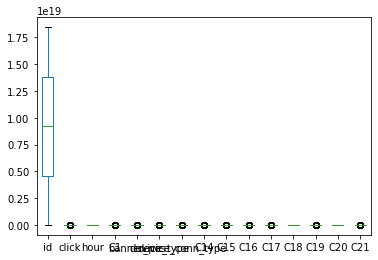

In [23]:
train.plot(kind='box')
plt.show()

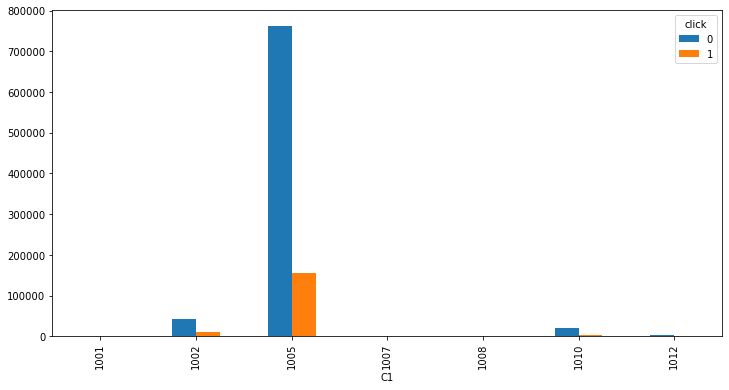

In [24]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6))

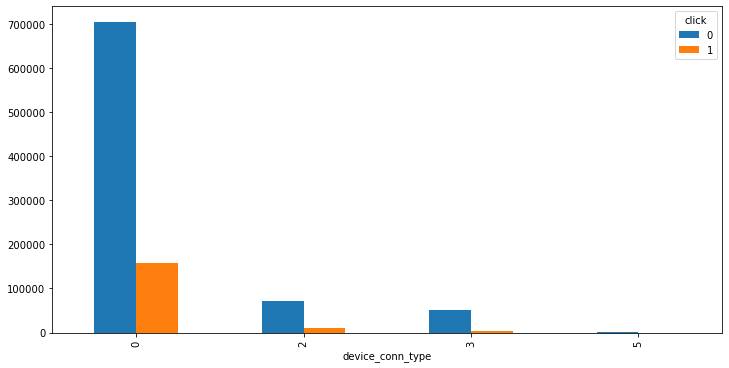

In [25]:
train.groupby(['device_conn_type', 'click']).size().unstack().plot(kind='bar', figsize=(12,6))

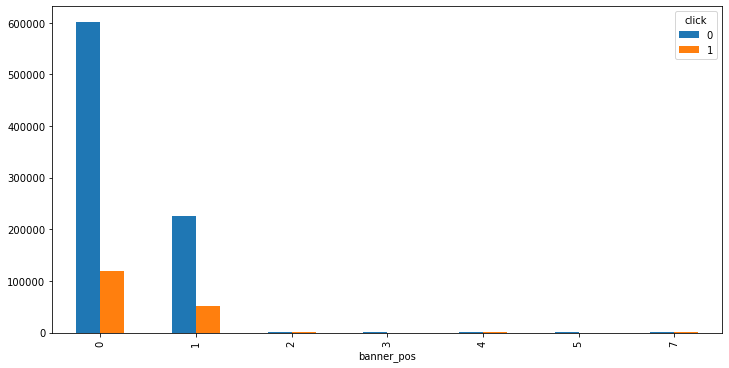

In [26]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6))

In [27]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [28]:
leb = defaultdict(LabelEncoder)
train = train.apply(lambda x: leb[x.name].fit_transform(x))
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,542766,0,0,2,0,315,2685,2,2935,92,...,1,0,241,3,2,54,0,2,63,22
1,543356,0,0,2,0,315,2685,2,2935,92,...,1,0,242,3,2,54,0,2,63,22
2,543706,0,0,2,1,1198,790,4,2935,92,...,1,1,660,3,2,105,0,2,0,42
3,543804,0,0,2,0,315,2685,2,2935,92,...,1,0,235,3,2,54,0,2,0,22
4,543895,0,0,2,0,383,2516,4,2935,92,...,1,0,629,3,2,147,0,4,138,42


In [29]:
test = test.apply(lambda x: leb[x.name].fit_transform(x))
test.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1081870,0,2,0,335,2545,20,2383,54,0,...,1,0,29,3,2,9,3,11,51,4
1,1081872,0,2,0,299,2516,1,2383,54,0,...,1,0,547,3,2,131,0,1,57,10
2,1081908,0,2,0,299,2516,1,2383,54,0,...,1,0,547,3,2,131,0,1,57,10
3,1081985,0,2,0,1249,2033,5,806,78,2,...,1,0,201,3,2,18,3,28,109,12
4,1082009,0,2,0,1249,2033,5,1584,15,24,...,1,0,704,3,2,152,0,5,0,30


In [30]:
X= train.drop("click", axis=1)

y= train.click

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
len(X)

1000000

In [33]:
test = scaler.transform(test)
len(test)

2000000

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

C:\Users\Akschaya balaji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
lRpredict = clf.predict(X_cv)

In [38]:
lRpredict_test = clf.predict(test)

In [39]:
lRpredict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
lRpredict1 = clf.predict_proba(X_cv)

In [41]:
test1 = pd.read_csv('C:/Users/Akschaya balaji/Downloads/test.gz',compression='gzip', nrows =2000000 ,
                                 header=0, sep=',', quotechar='"')

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_cv,lRpredict))

0.82924


In [43]:
confusion_matrix(y_cv,lRpredict)

array([[124339,     93],
       [ 25521,     47]], dtype=int64)

In [44]:
print(classification_report(y_cv,lRpredict))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    124432
           1       0.34      0.00      0.00     25568

    accuracy                           0.83    150000
   macro avg       0.58      0.50      0.46    150000
weighted avg       0.75      0.83      0.75    150000



In [45]:
submission = pd.DataFrame({
        "id": test1['id'],
        "click": lRpredict_test
    })
submission.to_csv('click.csv', index=False)
print(submission)

                   id  click
0        1.000017e+19      0
1        1.000018e+19      0
2        1.000055e+19      0
3        1.000109e+19      0
4        1.000138e+19      0
...               ...    ...
1999995  1.029082e+19      0
1999996  1.029082e+19      0
1999997  1.029083e+19      0
1999998  1.029083e+19      0
1999999  1.029084e+19      0

[2000000 rows x 2 columns]
